## **Prodigy Infotech Data Science Internship Task-4**


---



* Created Date:15.03.2024
* Created By: Blessy Louis
* edited on:15.03.2024

**Aim:** To Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Import the important libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data Set

In [ ]:
# Load the first CSV file
df1 = pd.read_csv('Tweet_train.csv')

# Load the second CSV file
df2 = pd.read_csv('Tweet_train.csv')

# Concatenate the dataframes vertically
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)  # Set index=False to exclude row numbers from the CSV
dfmerge=pd.read_csv('merged_file.csv')
dfmerge



,Tweet Id,entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
149359,9200,Nvidia,Positive,Just realized that the Windows partition of my...
149360,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
149361,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
149362,9200,Nvidia,Positive,Just realized between the windows partition of...


 Performing sentiment analysis

In [ ]:
from textblob import TextBlob
dfmerge['Tweet Content'] = dfmerge['Tweet Content'].fillna('')
# Define a function for sentiment analysis
def sentiment_analysis(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get the sentiment polarity (-1 for negative, 0 for neutral, 1 for positive)
    sentiment = blob.sentiment.polarity

    # Classify sentiment based on polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment == 0:
        return 'neutral'
    else:
        return 'negative'




In [ ]:
dfmerge['Sentiment'] = dfmerge['Tweet Content'].apply(sentiment_analysis)

# Save the updated dataframe to a new CSV file
dfmerge.to_csv('sentiment_analysis_result.csv', index=False)

# Visualize sentiment distribution

<ipython-input-23-e1575ba0bf38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=dfmerge, palette=colors)


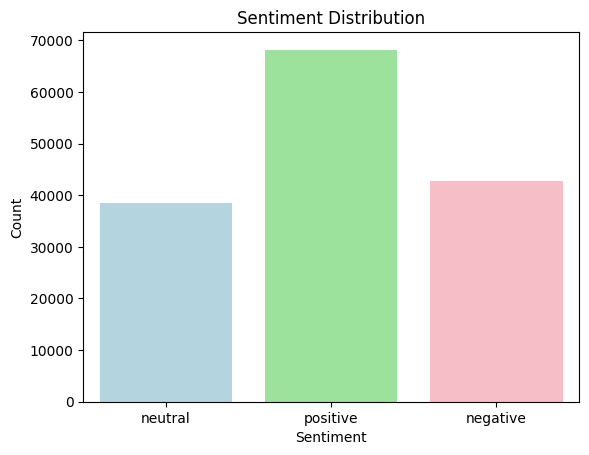

In [ ]:
colors = ["lightblue", "lightgreen", "lightpink"]

# Create the countplot with the specified palette
sns.countplot(x='Sentiment', data=dfmerge, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Word Cloud: Frequently Occurring Words

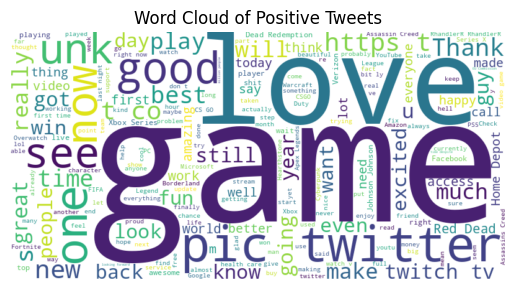

In [ ]:
from wordcloud import WordCloud
positive_tweets = dfmerge[dfmerge['Sentiment'] == 'positive']['Tweet Content'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.show()

# 3. Pie Chart: Proportion of Sentiments

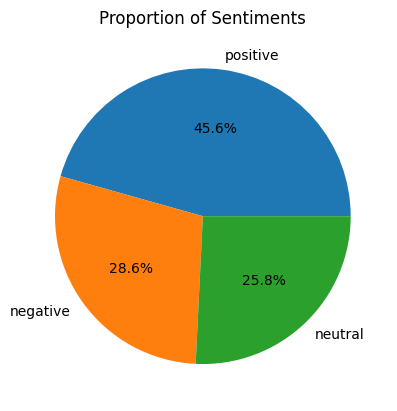

In [ ]:
sentiment_proportions = dfmerge['Sentiment'].value_counts(normalize=True)
plt.pie(sentiment_proportions, labels=sentiment_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Sentiments')
plt.show()

# **Scatter Plot**

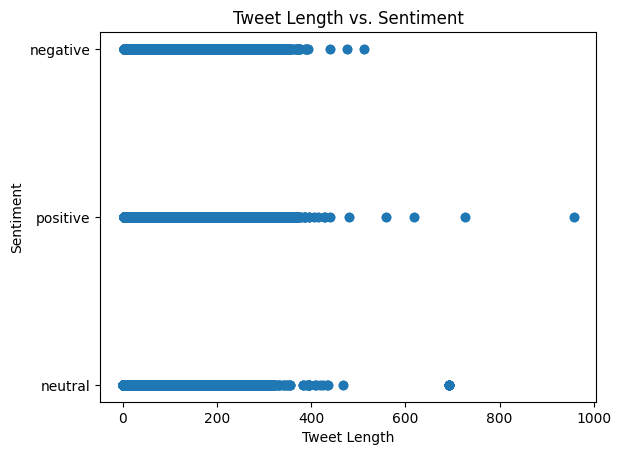

In [ ]:
dfmerge['Tweet Length'] = dfmerge['Tweet Content'].apply(len)

# Scatter plot: Tweet Length vs. Sentiment
plt.scatter(dfmerge['Tweet Length'], dfmerge['Sentiment'])
plt.title('Tweet Length vs. Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.show()